<a href="https://colab.research.google.com/github/friyk/DSL-30.110/blob/main/T01_Basys3_LogicGate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup


In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# T01: Basic Logic Gates on Basys 3 (T01_Basys3_LogicGate)

## Objectives:


Design and implement basic logic gates (NOT, AND, OR, XOR, NAND, NOR, XNOR) on the Basys 3 FPGA board using Verilog. Use switches `sw[0]` and `sw[1]` as inputs and LEDs `led[7:0]` to display the output of each gate. Demonstrate the input-output relationship using a truth table.

## Features:


1. **Inputs**:  
   - `sw[0]` (Input A)  
   - `sw[1]` (Input B)  
2. **Outputs**:  
   - Use `led[0]` to `led[7]` to represent the output of each logic gate (see table below).  
3. **Truth Table**:

| sw[1] (B) | sw[0] (A) | NOT A (led[0]) | NOT B (led[1]) | AND (led[2]) | OR (led[3]) | NOR (led[4]) | NAND (led[5]) | XOR (led[6]) | XNOR (led[7]) |
|:---------:|:---------:|:--------------:|:--------------:|:-----------:|:----------:|:-----------:|:------------:|:-----------:|:------------:|
| 0         | 0         | 1              | 1              | 0           | 0          | 1           | 1            | 0           | 1            |
| 0         | 1         | 0              | 1              | 0           | 1          | 0           | 1            | 1           | 0            |
| 1         | 0         | 1              | 0              | 0           | 1          | 0           | 1            | 1           | 0            |
| 1         | 1         | 0              | 0              | 1           | 1          | 0           | 0            | 0           | 1            |


## Instructions

  
### FPGA Project  
1. **Install Vivado** if you have not done so. [O1 Install Vivado FPGA Development Environment](https://classroom.google.com/c/NzM2NTAyNzI3NDY5/m/NzM3NDY5Mzk4NDQy/details)

2. **General Guides for Creating a new Vivado project** for the Basys 3 board. [O2 Vivado Project Guideline](https://classroom.google.com/u/0/c/NzM2NTAyNzI3NDY5/m/NzI1OTgzMjk4NTI2/details).

3. **Implementation**: There are two parts in this handson. The guidelines are illustrated in [simT01_Basys3_LogicGate](https://classroom.google.com/c/NzM2NTAyNzI3NDY5/m/NzM4NDA0MDkwMDQ5/details), where Youtube guides are also available.  
  - Simulation in Google Colab.
    - **Write a testbench** to verify all gate behaviors across all input combinations.  
    - **Simulate** the design and confirm outputs match the truth table.  
  - Copy the Verilog HDL files from Google Colab to Vivado.

4. **Key Steps**
  - i. **Write Verilog code** to implement the logic gates, mapping `sw[0]` and `sw[1]` as inputs and `led[0]` to `led[7]` as outputs.  

  - ii. **Map the design** to the Basys 3 board’s switches and LEDs using a `.xdc` constraint file.
  
  https://github.com/Digilent/digilent-xdc/blob/master/Basys-3-Master.xdc

  - iii. **Generate the bitstream**, program the FPGA, and test the logic gates.  

## Submission:

1. A self-contained `ipynb` file with:  
   - **Verilog code** (module, testbench, and waveform screenshots).  
   - **Google Colab/GitHub link** for collaboration.  
   - **Demo video** (showing switch inputs and LED outputs).  
   - **Brief report** documenting design steps, challenges, and lessons learned.
   - The report should present how AI is used in the design (if applicable). The guideline: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/G01_Used_of_AI_in_Design.ipynb)
     
2. Submit to **edimension** and share with instructor GitHub: `pe8sutd`.

### Deadline:  
Refer to the due date in the **edimension submission folder**.  

---

### Grading:  
- Correct implementation of all logic gates.  
- Accuracy of truth table and simulation results.  
- Code readability and constraint file correctness.

---




#Logic_Gate.v

Installing. Please wait... done!


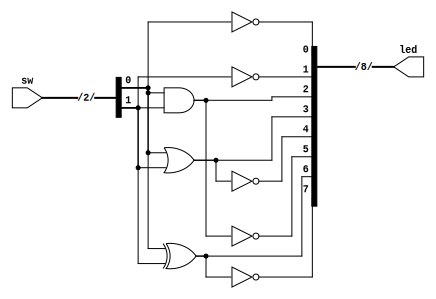

In [2]:
%%print_verilog
`timescale 1ns / 1ps
//
module logic_gate(
input [1:0]sw, // 2-bit input (sw[1], sw[0]), use 1 bit only
output [7:0]led // 8-bit output (led[7:0]), use 1 bit only
);
// Logic gate implementations
assign led[0] = ~sw[0]; // NOT A
assign led[1] = ~sw[1]; // NOT B
assign led[2] = sw[0] & sw[1]; // A AND B
assign led[3] = sw[0] | sw[1]; // A OR B
assign led[4] = ~(sw[0] | sw[1]); // A NOR B
assign led[5] = ~(sw[0] & sw[1]); // A NAND B
assign led[6] = sw[0] ^ sw[1]; // A XOR B
assign led[7] = ~(sw[0] ^ sw[1]); // A XNOR B

endmodule

//


#tb.v
Testbench


In [14]:
%%verilog
//
module logic_gate(
input [1:0]sw, // 2-bit input (sw[1], sw[0]), use 1 bit only
output [7:0]led // 8-bit output (led[7:0]), use 1 bit only
);
// Logic gate implementations
assign led[0] = ~sw[0]; // NOT A
assign led[1] = ~sw[1]; // NOT B
assign led[2] = sw[0] & sw[1]; // A AND B
assign led[3] = sw[0] | sw[1]; // A OR B
assign led[4] = ~(sw[0] | sw[1]); // A NOR B
assign led[5] = ~(sw[0] & sw[1]); // A NAND B
assign led[6] = sw[0] ^ sw[1]; // A XOR B
assign led[7] = ~(sw[0] ^ sw[1]); // A XNOR B

endmodule
//

//
module tb;
    reg [1:0]sw;
    wire [7:0]led;

    logic_gate uut (sw, led);

initial begin
    $dumpfile("tb.vcd");
    $dumpvars(0,tb);

        sw[0] =  1'b0;
        sw[1] = 1'b0;
        #2
        sw[0] = 1'b1;
        #2
        sw[0] = 1'b0;
        sw[1] = 1'b1;
        #2
        sw[0] = 1'b1;
        #2 $finish;

    $dumpoff;
end

endmodule
//

VCD info: dumpfile tb.vcd opened for output.



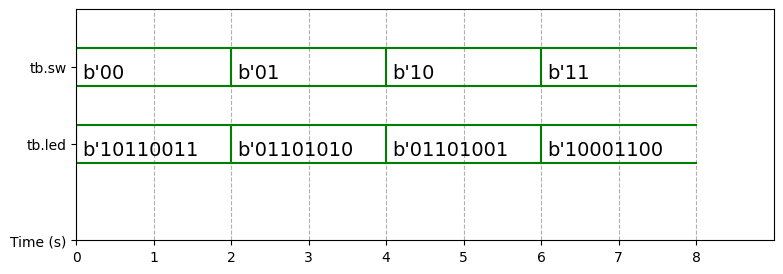

In [15]:
%%waveform tb.vcd
sign_list = ['tb.sw','tb.led']
time_begin = 0
time_end = 8
base = 'bin' # bin, dec, dec2, hex, octal

#Video Showcase


![SW00](https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/figure/T01_sw00.jpg?raw=1)

# Demo

Show the LEDs updating in real-time as switches `sw[0]` and `sw[1]` toggle.

### SW[1:0] = 2'b00
![SW00](https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/figure/T01_sw00.jpg?raw=1)

### SW[1:0] = 2'b01
![SW01](https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/figure/T01_sw01.jpg?raw=1)

### SW[1:0] = 2'b10
![SW10](https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/figure/T01_sw10.jpg?raw=1)

### SW[1:0] = 2'b11
![SW11](https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/figure/T01_sw11.jpg?raw=1)